In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime


In [28]:
free_session_info=pd.read_csv('free_session_info.csv')

In [29]:
free_session_info.head()

,Time Stamp,Name of the candidate,Contact,Email id,College name,Brach,People having laptop,Souce of communication,Unnamed: 8,Unnamed: 9,Country
0,8/24/2020 17:01:39,A.S.M. Raquibul Hasan,01722577922,raquibul.nsu@gmail.com,United International University,others,Yes,Facebook,NaN,NaN,Bangladesh
1,8/24/2020 10:08:54,Abdullah,NaN,sharif3abdullah@gmail.com,IIT,Engineering,NaN,NaN,NaN,NaN,Bangladesh
2,8/24/2020 9:20:28,Abdullah Bin Murad,01552443554,abmrifat54@gmail.com,Shahjalal University of Science and Technology,Engineering,Yes,NaN,NaN,NaN,Bangladesh
3,7/28/2020 12:16:30,Abhijoy Mukherjee,7003206060,abhijoymukherjee01@gmail.com,Asutosh College,Statistics,Yes,Friend,4.0,NaN,India
4,7/10/2020 13:56:14,Abhipreeti Acharjee,8274839744,deepamandal007@gmail.com,"DEPARTMENT OF PURE MATHEMATICS, UNIVERSITY OF ...",PURE MATHEMATICS,Yes,NaN,2.0,NaN,India


In [30]:
free_session_info.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968 entries, 0 to 967
Data columns (total 11 columns):
Time Stamp                 948 non-null object
Name of the candidate      947 non-null object
Contact                    909 non-null object
Email id                   946 non-null object
College name               940 non-null object
Brach                      933 non-null object
People having laptop       940 non-null object
Souce of communication     432 non-null object
Unnamed: 8                 318 non-null float64
Unnamed: 9                 0 non-null float64
Country                    476 non-null object
dtypes: float64(2), object(9)
memory usage: 49.2+ KB


# Drop unnecessary columns and set new column name

In [31]:
free_session_info=free_session_info.drop(columns=['Unnamed: 8','Unnamed: 9'])

In [32]:
free_session_info.columns=['Time stamp','Name','Contact','Email','University','Department','Have laptop','Communication source','Country']


# change data type

In [33]:
free_session_info['Time stamp'] = pd.to_datetime(free_session_info['Time stamp'],errors='coerce')


In [34]:
free_session_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968 entries, 0 to 967
Data columns (total 9 columns):
Time stamp              946 non-null datetime64[ns]
Name                    947 non-null object
Contact                 909 non-null object
Email                   946 non-null object
University              940 non-null object
Department              933 non-null object
Have laptop             940 non-null object
Communication source    432 non-null object
Country                 476 non-null object
dtypes: datetime64[ns](1), object(8)
memory usage: 37.9+ KB


# find missing values 

In [35]:
free_session_info.isna().sum()

Time stamp               22
Name                     21
Contact                  59
Email                    22
University               28
Department               35
Have laptop              28
Communication source    536
Country                 492
dtype: int64

In [36]:
free_session_info.replace({'?':np.nan,'--':np.nan,'-':np.nan},inplace=True)

# Country missing value assign using contact and handle other missing values

In [37]:

free_session_info.Country=np.where(len(free_session_info.Contact)>10,free_session_info.Country.fillna('Bangladesh'),free_session_info.Country.fillna('India'))

In [38]:
free_session_info.isna().sum()

Time stamp               22
Name                     21
Contact                  59
Email                    22
University               28
Department               35
Have laptop              28
Communication source    536
Country                   0
dtype: int64

In [39]:
free_session_info['Communication source'].fillna('Unknown',inplace=True)

# Drop Nan rows and reset index

In [40]:
free_session_info_dropped=free_session_info.dropna()

In [41]:
free_session_info=free_session_info_dropped.reset_index(drop=True)


In [42]:
free_session_info

,Time stamp,Name,Contact,Email,University,Department,Have laptop,Communication source,Country
0,2020-08-24 17:01:39,A.S.M. Raquibul Hasan,01722577922,raquibul.nsu@gmail.com,United International University,others,Yes,Facebook,Bangladesh
1,2020-08-24 09:20:28,Abdullah Bin Murad,01552443554,abmrifat54@gmail.com,Shahjalal University of Science and Technology,Engineering,Yes,Unknown,Bangladesh
2,2020-07-28 12:16:30,Abhijoy Mukherjee,7003206060,abhijoymukherjee01@gmail.com,Asutosh College,Statistics,Yes,Friend,India
3,2020-07-10 13:56:14,Abhipreeti Acharjee,8274839744,deepamandal007@gmail.com,"DEPARTMENT OF PURE MATHEMATICS, UNIVERSITY OF ...",PURE MATHEMATICS,Yes,Unknown,India
4,2020-07-28 13:14:59,Abhiraj Bhattacharya,6289897311,abhattacharyya2001@gmail.com,Vivekananda College,B.Sc statistics,Yes,Friend,India
5,2020-08-20 11:18:50,Abhirup Boxi,9932801949,abhirupboxi99@gmail.com,Future institute of engineering and management,Engineering,Yes,Friend,India
6,2020-07-10 14:33:11,Abhisek Roy,9064264755,paulbanashri159@gmail.com,Narasinha dutt college,M.sc,Yes,Rajeswari pal,India
7,2020-07-10 14:36:44,Abhishek Ghosh,6289860850,raunaksikdar1997@gmail.com,NARASINHA DUTT COLLEGE,M.Sc. in Applied Mathematics,Yes,Via WhatsApp message of one of my friend,India
8,2020-07-26 17:51:34,Abhishek Singh,6260303830,as1973240@gmail.com,Global Nature Care Sangathan Group Of Institut...,Civil Engineering,No,Social media,India
9,2020-08-24 18:28:59,Abu Nadif,01730011811,abunadif141414@gmail.com,AIUB,Engineering,Yes,Unknown,Bangladesh


In [44]:
free_session_info['collage name']=free_session_info['University'].apply(lambda x: x.lower())
free_session_info

,Time stamp,Name,Contact,Email,University,Department,Have laptop,Communication source,Country,collage name
0,2020-08-24 17:01:39,A.S.M. Raquibul Hasan,01722577922,raquibul.nsu@gmail.com,United International University,others,Yes,Facebook,Bangladesh,united international university
1,2020-08-24 09:20:28,Abdullah Bin Murad,01552443554,abmrifat54@gmail.com,Shahjalal University of Science and Technology,Engineering,Yes,Unknown,Bangladesh,shahjalal university of science and technology
2,2020-07-28 12:16:30,Abhijoy Mukherjee,7003206060,abhijoymukherjee01@gmail.com,Asutosh College,Statistics,Yes,Friend,India,asutosh college
3,2020-07-10 13:56:14,Abhipreeti Acharjee,8274839744,deepamandal007@gmail.com,"DEPARTMENT OF PURE MATHEMATICS, UNIVERSITY OF ...",PURE MATHEMATICS,Yes,Unknown,India,"department of pure mathematics, university of ..."
4,2020-07-28 13:14:59,Abhiraj Bhattacharya,6289897311,abhattacharyya2001@gmail.com,Vivekananda College,B.Sc statistics,Yes,Friend,India,vivekananda college
5,2020-08-20 11:18:50,Abhirup Boxi,9932801949,abhirupboxi99@gmail.com,Future institute of engineering and management,Engineering,Yes,Friend,India,future institute of engineering and management
6,2020-07-10 14:33:11,Abhisek Roy,9064264755,paulbanashri159@gmail.com,Narasinha dutt college,M.sc,Yes,Rajeswari pal,India,narasinha dutt college
7,2020-07-10 14:36:44,Abhishek Ghosh,6289860850,raunaksikdar1997@gmail.com,NARASINHA DUTT COLLEGE,M.Sc. in Applied Mathematics,Yes,Via WhatsApp message of one of my friend,India,narasinha dutt college
8,2020-07-26 17:51:34,Abhishek Singh,6260303830,as1973240@gmail.com,Global Nature Care Sangathan Group Of Institut...,Civil Engineering,No,Social media,India,global nature care sangathan group of institut...
9,2020-08-24 18:28:59,Abu Nadif,01730011811,abunadif141414@gmail.com,AIUB,Engineering,Yes,Unknown,Bangladesh,aiub


# Visualize most students are from which University and departments 

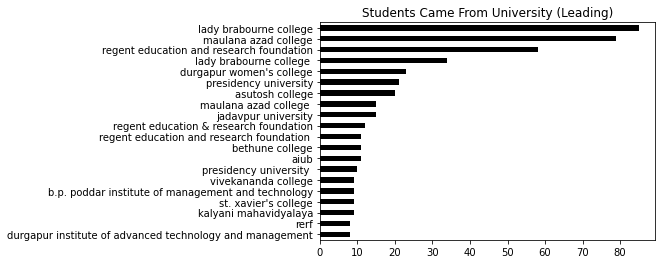

In [21]:
university=free_session_info['collage name'].value_counts()[:20].sort_values(ascending=True).plot(kind='barh',color='black',linewidth=2,title='Students Came From University (Leading)')

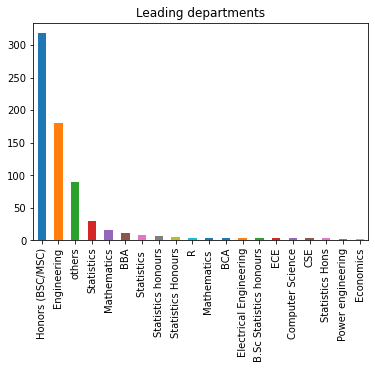

In [22]:
department=free_session_info['Branch'].value_counts()[:20].sort_values(ascending=False).plot(kind='bar',linewidth=2,title='Leading departments')

# Showing People are having laptop or not

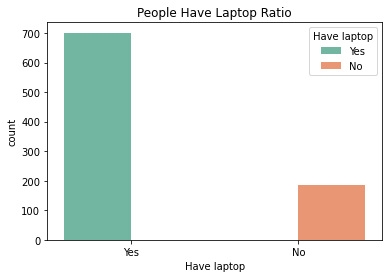

In [24]:
import seaborn as sns
sns.countplot(x="Have laptop",hue='Have laptop', data=free_session_info,palette="Set2")
plt.title('People Have Laptop Ratio')
plt.show()


# Showing University,Department,Country of those people who don't have laptop 

In [25]:
show=free_session_info.loc[(free_session_info['Have laptop']=='No')][['Collage Name','Branch','Country']]

In [26]:
show.head()

,Collage Name,Branch,Country
8,Global Nature Care Sangathan Group Of Institut...,Civil Engineering,India
20,Ramakrishna Mission Shilpapitha,Electronics and telecommunication,India
23,Viswass school & college of nursing,B.sc nursing,India
25,Maulana Azad College,Statistics (H),India
28,Insitiution of engineering and managment,B. Tech (Cse),India


# Showing by whom they get to know about the program

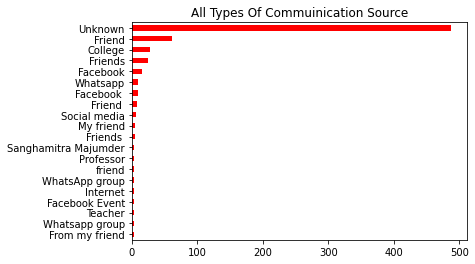

In [22]:
communication_source=free_session_info['Communication source'].value_counts()[:20].sort_values(ascending=True).plot(kind='barh',linewidth=2,color='red',title='All Types Of Commuinication Source')